<a href="https://colab.research.google.com/github/adrianaleticiamartinez/MCD/blob/main/ML1_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Media Bot Detection Project

GitHub link: https://github.com/adrianaleticiamartinez/MCD/tree/main

## Project Metadata

- **University:** Universidad Panamericana
- **Course:** Machine Learning I
- **Team Members:**
  - David Arturo Hernández Gómez
  - Adriana Leticia Martínez Estrada
- **Date:** December 5th, 2023
- **Code Version:** 2.1

## Project Overview

### Description
The advent of social media has been accompanied by the proliferation of automated accounts or 'bots' that can significantly influence the dissemination of information. These bots can be benign, serving to automate repetitive tasks, or malicious, spreading misinformation or spam. The goal of this project is to create a supervised machine learning model that can accurately distinguish between human users and bots based on their behavior on social media platforms.

### Objectives
- To understand the patterns and characteristics that differentiate bot behavior from human behavior.
- To implement a binary classification model that can predict whether a social media account is a bot.
- To evaluate the model's performance using metrics such as AUC-ROC, accuracy, and sensitivity.

## Methodology

### Data Processing
We begin by sourcing data from known bot and human-operated accounts, extracting features indicative of their behavior patterns.

### Model Development
We will explore various machine learning algorithms, fine-tune our models, and validate their performance rigorously.

### Evaluation
Performance of the models will be assessed using the AUC-ROC curve, accuracy, recall, and f1-score metrics, ensuring a robust evaluation framework.

## Execution Instructions
Please execute all the notebook cells in sequential order. Each cell is documented to describe the processes being performed, from data preprocessing to model evaluation.

---

*For detailed analysis and discussion on the results, please refer to the subsequent sections of this notebook.*



#Requirements

In [ ]:
!pip install pandas==1.5.3  numpy==1.23.5 matplotlib==3.7.1 scikit-learn==1.2.2 gradio==4.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.4 MB/s 

## Implementation

In [ ]:
# Necessary library imports
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
import joblib


In [ ]:
import warnings;
warnings.simplefilter('ignore')

In [ ]:
# Global variables
DATASET_BOT_PATH = 'https://raw.githubusercontent.com/adrianaleticiamartinez/MCD/main/ML1_Project/datasets/botwiki-2019/botwiki-2019.tsv'
DATASET_BOT_COMPLEMENT_PATH = "https://raw.githubusercontent.com/adrianaleticiamartinez/MCD/main/ML1_Project/datasets/botwiki-2019/botwiki-2019_tweets.json"
DATASET_USER_PATH = 'https://raw.githubusercontent.com/adrianaleticiamartinez/MCD/main/ML1_Project/datasets/verified-2019/verified-2019.tsv'
DATASET_USER_COMPLEMENT_PATH = 'https://raw.githubusercontent.com/adrianaleticiamartinez/MCD/main/ML1_Project/datasets/verified-2019/verified-2019_tweets.json'

In [ ]:
param_grid_svm = {
    'C': [1, 10, 100],
    'gamma': [1, 0.1, 0.5, 0.05, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

param_grid_tree = {
    'max_depth': [5, 50, 100],
    'min_samples_split': [4, 5, 10],
    'min_samples_leaf': [1, 2, 8]
}

### Auxiliar methods

In [ ]:
#Cleaning single field registries
def columns_analize(df, unique_classes):
  """
    This function checks if a column have only a single or maximun
    n numbers of clases

    Returns:
        df (DataFrame): Dataframe to be analyzed.
        unique_classes (int): Number of clases to search
  """
  columns_to_drop = []
  for i in df.columns:
    if len(list(df[i].value_counts())) <= unique_classes:
      columns_to_drop.append(i)
  return columns_to_drop

In [ ]:
#Method for plotting evalauation metrics of models
def plot_evaluation_metrics(model, X_test, y_test, y_pred, model_name, model_set_name=""):
    # calculating AUC-ROC
    if hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    else:
        y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Creating subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f"{model_set_name} {model_name} Evaluation")

    #   Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs[0])
    axs[0].set_title("Confusion Matrix")

    #  ROC Curve plot
    axs[1].plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    axs[1].plot([0, 1], [0, 1], 'k--')
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive Rate')
    axs[1].set_title('ROC Curve')
    axs[1].legend(loc="lower right")

    plt.show()

### Steps Functions

In [ ]:
# Main data preprocessing and analysis functions
def preprocess_data():
    """
    Preprocesses the raw data by cleaning and encoding features.

    Returns:
        X_train_preprocessed (array): Preprocessed training features.
        X_test_preprocessed (array): Preprocessed testing features.
        y_train (array): Encoded training labels.
        y_test (array): Encoded testing labels.
    """
    #--Extraction--

    #Reading bot information
    data_raw_bot = pd.read_csv(DATASET_BOT_PATH,sep='\t', header=0,  names=['id', 'label'])
    data_raw_bot_complement = pd.read_json(DATASET_BOT_COMPLEMENT_PATH)
    df_unpacked_bot = pd.json_normalize(data_raw_bot_complement['user'])
    joined_bot_data = pd.merge(data_raw_bot, df_unpacked_bot, on="id")

    #Reading user information
    data_raw_user = pd.read_csv(DATASET_USER_PATH,sep='\t', header=0,  names=['id', 'label'])
    data_raw_user_complement = pd.read_json(DATASET_USER_COMPLEMENT_PATH)
    df_unpacked_user = pd.json_normalize(data_raw_user_complement['user'])
    joined_user_data = pd.merge(data_raw_user, df_unpacked_user, on="id")

    #Full data
    frames = [joined_bot_data, joined_user_data]
    full_data = pd.concat(frames)

    #--Transformation--
    size_Data = len(full_data)
    #Droping all columns with duplicated information
    full_data = full_data.drop(columns = ["id_str", "name"])

    #Look for all columns in wich all the values are the same
    unique_value_all_columns = columns_analize(full_data, 1)
    full_data = full_data.drop(columns = unique_value_all_columns)

    #Look for all the columns in wich the max number of classes are 5
    only_two_values_columns = columns_analize(full_data, 5)
    columns_to_drop = []
    for i in only_two_values_columns:
      percentage_same_value = [(x / size_Data) for x in list(full_data[i].value_counts())]
      for j in percentage_same_value:
        if j > 0.9:
          columns_to_drop.append(i)
    #Drop all columns in wich most of the values are in one class
    full_data = full_data.drop(columns = columns_to_drop)

    #Droping all columns that contain an URL
    columns_with_url = full_data.filter(regex='url', axis=1)

    full_data = full_data.drop(columns = columns_with_url.columns)

    #Droping all columns with color data
    columns_with_color = full_data.filter(like='color', axis=1)

    full_data = full_data.drop(columns=columns_with_color.columns)

    #Droping creation date column
    full_data = full_data.drop(columns=["created_at"])
    #Droping description column

    full_data = full_data.drop(columns=["description"])

    #Data Segmentation

    X = full_data[["location", "followers_count", "friends_count", "listed_count", "favourites_count", "geo_enabled", "verified", "statuses_count", "profile_background_tile", "profile_use_background_image", "has_extended_profile", "default_profile"]]
    y = full_data["label"]

    #Split_data into train and test

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=117)

    #Pipelines
    #Pipeline to scaling and impute numerical data in the dataset
    attributes_number = Pipeline(steps = [
        ('null_replacement', SimpleImputer(strategy = 'mean')),
        ('scaling', StandardScaler())
    ])
    #Pipeline to impute and encode all categorical data in the dataset
    attributes_category = Pipeline(steps = [
        ('null_replacement', SimpleImputer(strategy = 'most_frequent')),
        ('encoding', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False))
    ])

    attributes_preprocess = ColumnTransformer(transformers = [
        ('number', attributes_number, X_train.select_dtypes(include='number').columns.tolist()),
        ('category', attributes_category, X_train.select_dtypes(include='category').columns.tolist())
    ])
    label_encoding = LabelEncoder()
    #Encode the target variable
    y_train = label_encoding.fit_transform(y_train)

    preprocessor = ColumnTransformer(transformers=[
        ('number', attributes_number, X_train.select_dtypes(include='number').columns.tolist()),
        ('category', attributes_category, X_train.select_dtypes(include='category').columns.tolist())
    ])
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)

    y_test_encoded = label_encoding.transform(y_test)


    return X_train_preprocessed, X_test_preprocessed, y_train, y_test_encoded

In [ ]:
def train_models(X_train_preprocessed, y_train):
    """
    Trains Ridge and Decision Tree classifiers.

    Args:
        X_train (array): Training features.
        y_train (array): Training labels.

    Returns:
        ridge_model (RidgeClassifier): Trained Ridge classifier.
        tree_model (DecisionTreeClassifier): Trained Decision Tree classifier.
        logistic_model (LogisticRegression) :Trained Logistic Regression
        svm_model (SVC): Trained Support Vector.
    """
    times=[]

    start_time= time.time()
    #--L2 (RidgeClassifier)--
    ridge_model = RidgeClassifier(random_state=117)
    ridge_model.fit(X_train_preprocessed, y_train)
    end_time= time.time()
    times.append(end_time - start_time)

    #--tree_model (DecisionTreeClassifier)
    start_time= time.time()
    tree_model = DecisionTreeClassifier(random_state=117)
    tree_model.fit(X_train_preprocessed, y_train)
    end_time= time.time()
    times.append(end_time - start_time)

    #--Support Vector Machine (SVC)
    start_time= time.time()
    svm_model = svm.SVC(random_state=117)
    svm_model.fit(X_train_preprocessed, y_train)
    end_time= time.time()
    times.append(end_time - start_time)


    #--Logistic_regression (LogisticRegression)
    start_time= time.time()
    logistic_model = LogisticRegression(random_state=117)
    logistic_model.fit(X_train_preprocessed, y_train)
    end_time= time.time()
    times.append(end_time - start_time)

    return ridge_model, tree_model, svm_model, logistic_model,times

In [ ]:
def gridSearch_method(model, dict_parms,x,y):
    """
    Trins a model under method grid search.

    Args:
        model (scikit_learn model): Model to be trained.
        dict_parms (dict): Params with the region to be trained.
        x (array): Training features.
        y (array): Training labels.

    Returns:
        best_paramns (dict): Dict with the best params of the model
    """
    grid_search = GridSearchCV(estimator=model, param_grid=dict_parms, cv=5, scoring='accuracy')
    grid_search.fit(x, y)
    best_params = grid_search.best_params_
    return best_params

In [ ]:
def train_models_with_GS(X_train_preprocessed, y_train):
    """
    Trains Ridge, Decision Tree, SVM, Logistic regression classifiers.
    Using Gridsearch on Decision tree and SVM
    Args:
        X_train (array): Training features.
        y_train (array): Training labels.

    Returns:
        ridge_model (RidgeClassifier): GridSearch Trained Ridge classifier.
        tree_model (DecisionTreeClassifier): GridSearch Trained Decision Tree classifier.
        logistic_model (LogisticRegression) : GridSearch Trained Logistic Regression
        svm_model (SVC): GridSearch Trained Support Vector.
    """
    times=[]



    #--L2 (RidgeClassifier)--
    start_time = time.time()
    ridge_model = RidgeClassifier(random_state=117)
    ridge_model.fit(X_train_preprocessed, y_train)
    end_time = time.time()
    times.append(end_time - start_time)

    #--tree_model (DecisionTreeClassifier)

    start_time = time.time()
    tree_model = DecisionTreeClassifier(random_state=117)
    best_params_tree = gridSearch_method(tree_model, param_grid_tree,X_train_preprocessed,y_train)
    tree_best_model = DecisionTreeClassifier(**best_params_tree,random_state=117)
    tree_best_model.fit(X_train_preprocessed, y_train)
    end_time = time.time()
    times.append(end_time - start_time)

    #--Support Vector Machine (SVC)
    start_time = time.time()
    svm_model = svm.SVC(random_state=117)
    best_params_svm = gridSearch_method(svm_model, param_grid_svm,X_train_preprocessed,y_train)
    svm_best_model = svm.SVC(**best_params_svm,random_state=117)
    svm_best_model.fit(X_train_preprocessed, y_train)
    end_time = time.time()
    times.append(end_time - start_time)

    #--Logistic_regression (LogisticRegression)
    start_time = time.time()
    logistic_model = LogisticRegression(random_state=117)
    logistic_model.fit(X_train_preprocessed, y_train)
    end_time = time.time()
    times.append(end_time - start_time)



    return ridge_model, tree_best_model, svm_best_model, logistic_model, times

In [ ]:
def classification_report_to_df(report_dict, model_name):
  """
    This method transform some of the values of the method classification_report
    into a dataframe
    Args:
        report_dict (dict): classification_report in format of dict
        model_name (string): String with the name of the model
    Returns:
        DataFrame: report of model performance.
  """
  data = {'model_name': model_name}
  for key, value in report_dict.items():
    if key == 'accuracy':
      data['accuracy'] = value
    elif key == 'weighted avg':
      data['f1-score'] = value['f1-score']
      data['recall'] = value['recall']
  return pd.DataFrame([data])


In [ ]:
def evaluate_models(X_test_preprocessed, y_test_encoded, model_set_name="", *models):
    """
    Evaluates the performance of the trained models using AUC-ROC, precision, recall, and f1-score.

    Args:
        X_test_preprocessed (array): Preprocessed testing features.
        y_test_encoded (array): Encoded testing labels.
        ridge_model (RidgeClassifier): Trained Ridge classifier.
        tree_model (DecisionTreeClassifier): Trained Decision Tree classifier.
        svm_model (SVC): Trained Support Vector Machine classifier.
        logistic_model (LogisticRegression): Trained Logistic Regression classifier.

    Returns:
        DataFrame (report_df): Summary report of model performance.
        Dictionary (accuracies): accuracies of each of the models for further evaluation
    """

    report_df = pd.DataFrame(columns=["model_name", "accuracy", "f1-score", "recall"])
    accuracies = {}

    for model in models:
        model_name = type(model).__name__
        y_pred = model.predict(X_test_preprocessed)
        accuracy = model.score(X_test_preprocessed, y_test_encoded)
        accuracies[model_name] = accuracy

        report = classification_report(y_test_encoded, y_pred, output_dict=True)
        report_df = report_df.append(classification_report_to_df(report, model_name))

        # Llamada a la función de trazado
        plot_evaluation_metrics(model, X_test_preprocessed, y_test_encoded, y_pred, model_name, model_set_name)

    return report_df, accuracies

In [ ]:
#Saving best model
def save_best_model(model_dict, accuracies, model_set_name=""):
    best_model_name = max(accuracies, key=accuracies.get)
    best_model = model_dict[best_model_name]
    best_accuracy = accuracies[best_model_name]
    filename = f'{best_model_name}_{model_set_name}.sav'
    joblib.dump(best_model, filename)
    print(f"Model {best_model_name} from {model_set_name} saved as {filename}")
    return best_model_name, best_accuracy, filename

#Main

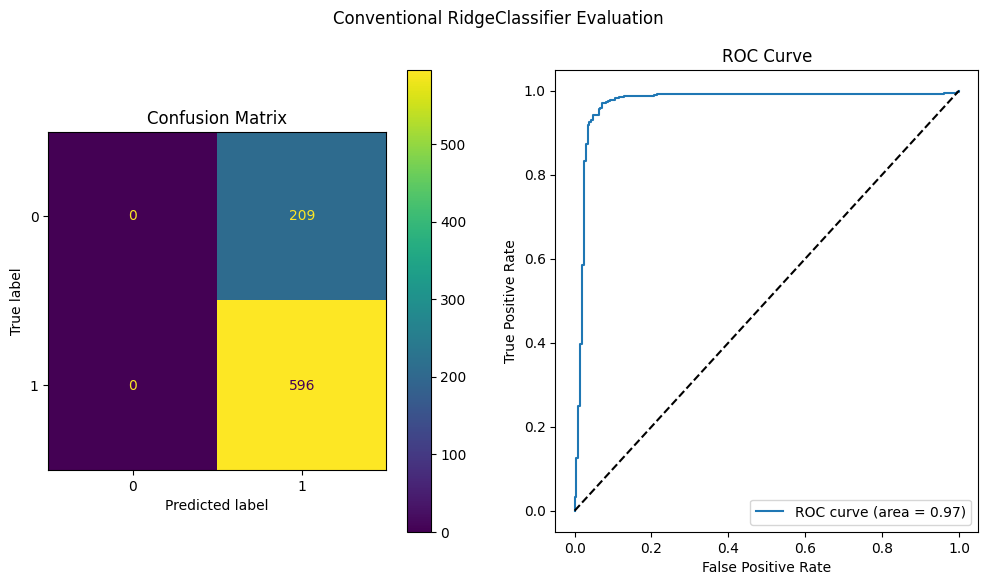

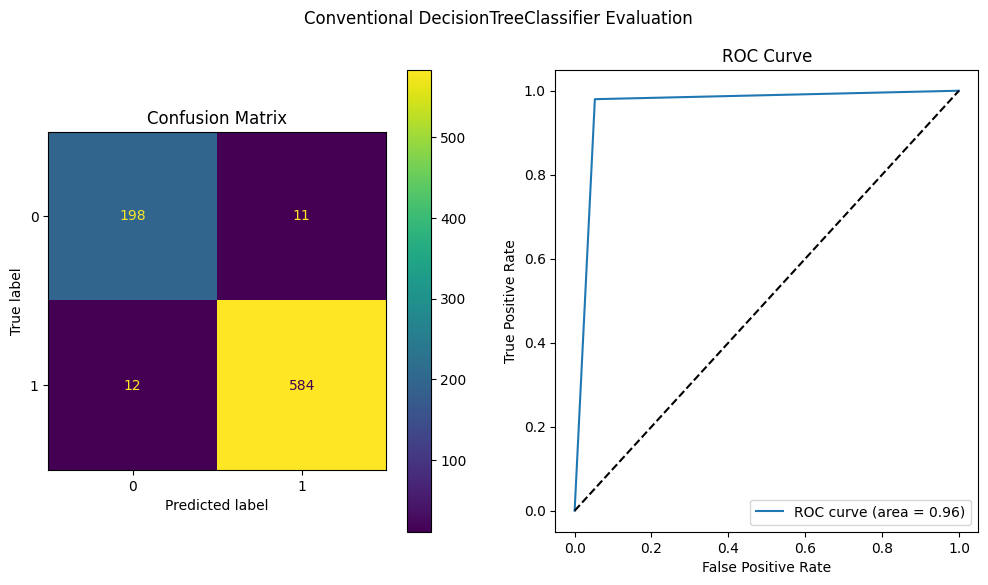

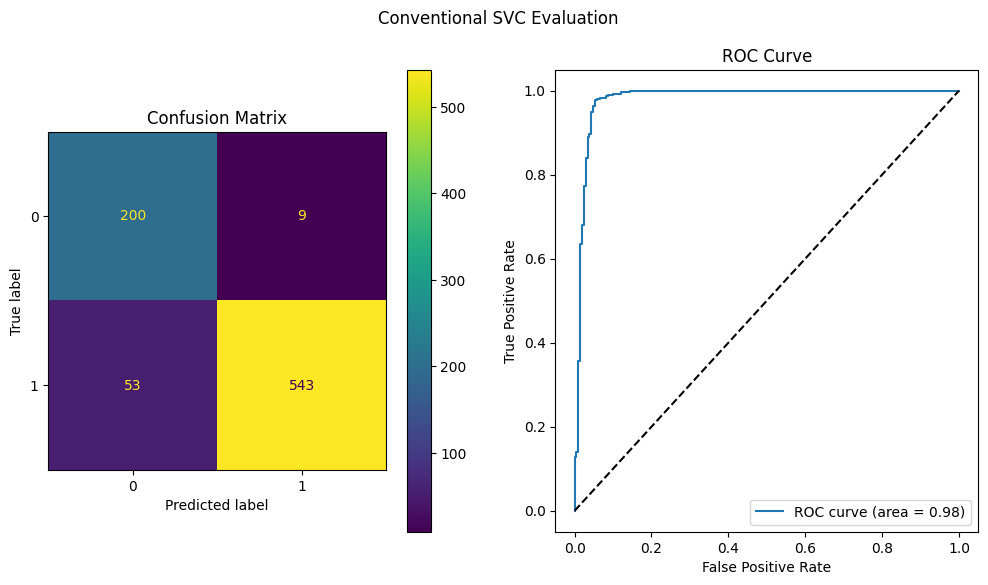

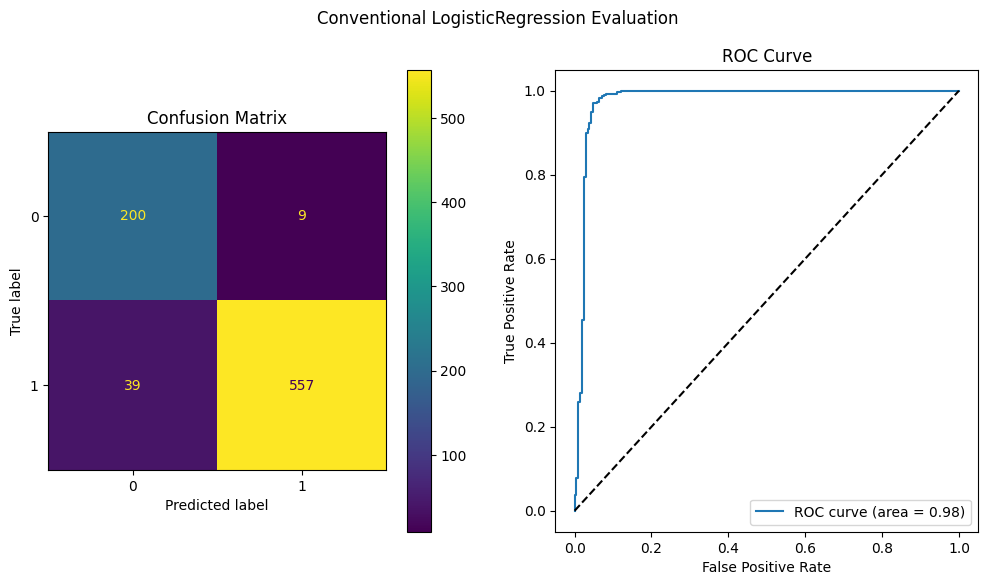

Model DecisionTreeClassifier from conventional saved as DecisionTreeClassifier_conventional.sav


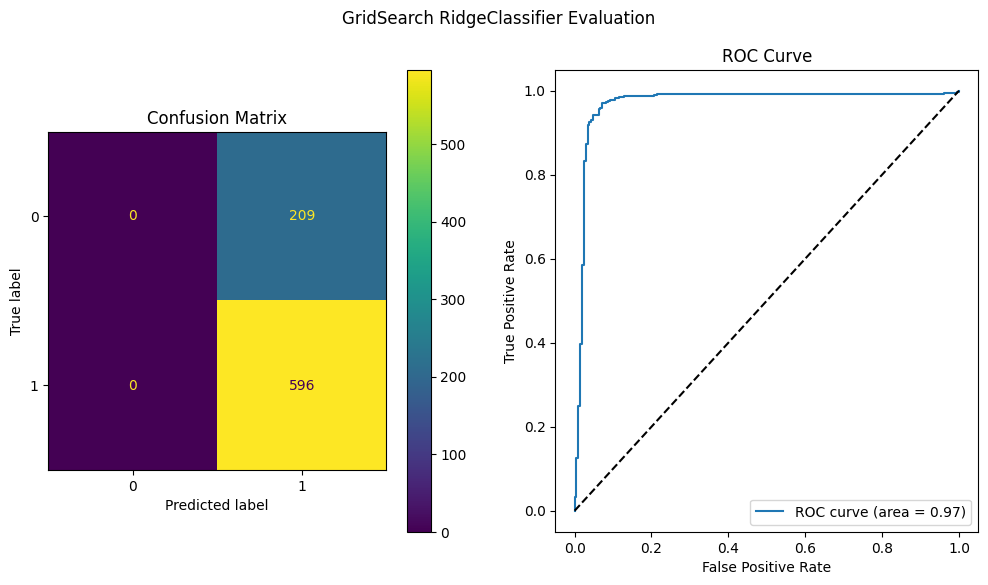

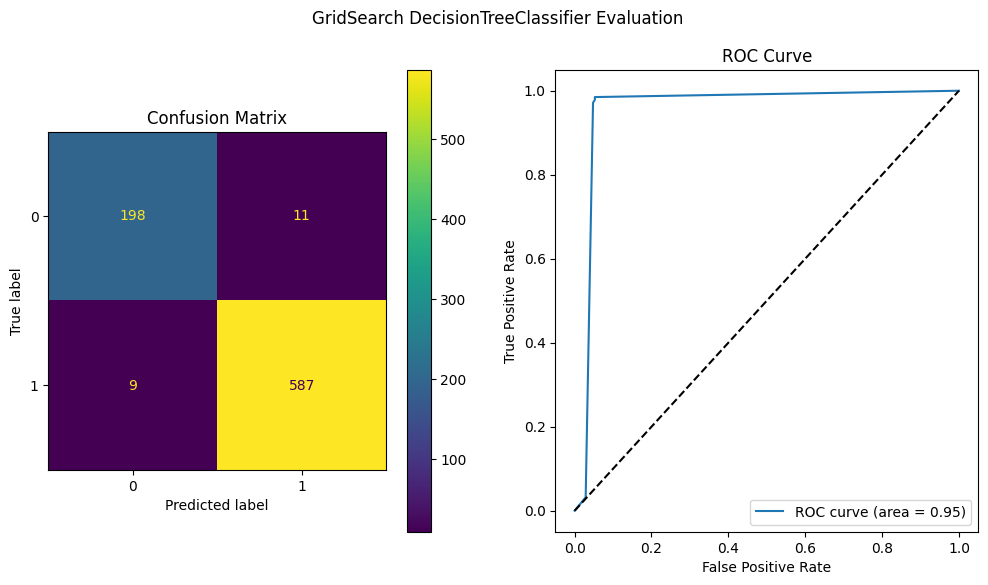

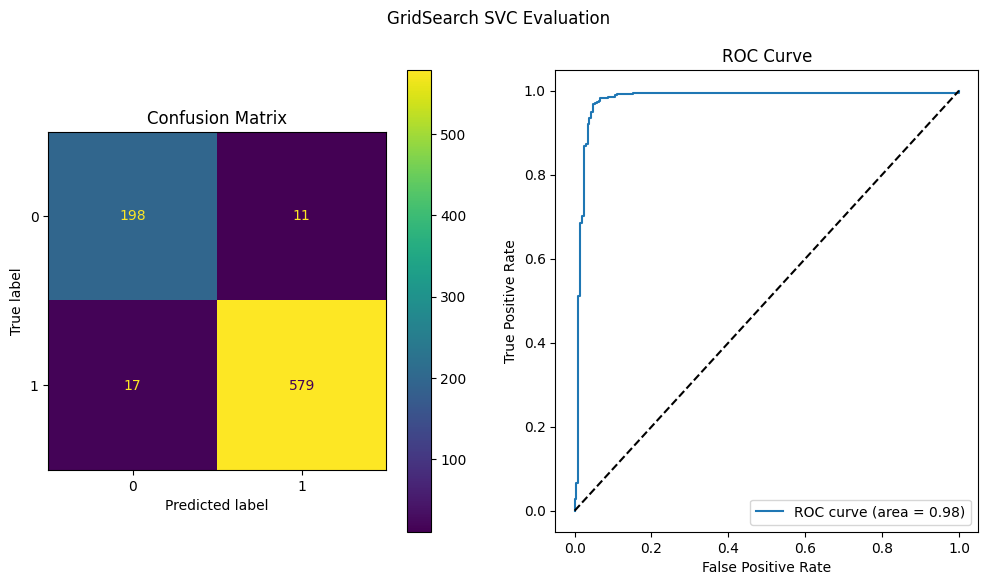

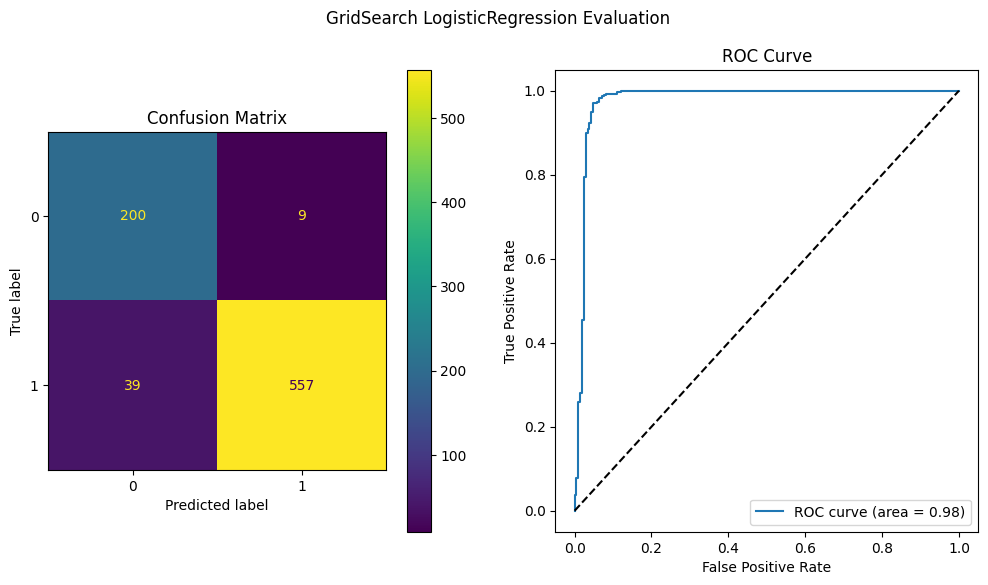

Model DecisionTreeClassifier from gridsearch saved as DecisionTreeClassifier_gridsearch.sav
The best overall model is from GridSearch: DecisionTreeClassifier with accuracy 0.9751552795031055


In [ ]:
# Main script execution
if __name__ == "__main__":
    # Data preprocessing
    X_train_preprocessed, X_test_preprocessed, y_train, y_test_encoded = preprocess_data()

    # Model training
    ridge_model, tree_model, svm_model, logistic_model, c_times = train_models(X_train_preprocessed, y_train)

    # Model evaluation
    #report_df, accuracies = evaluate_models(X_test_preprocessed, y_test_encoded, ridge_model, tree_model, svm_model, logistic_model)
    #report_df, accuracies = evaluate_models_r(X_test_preprocessed, y_test_encoded, ridge_model, tree_model, svm_model, logistic_model)
    report_df, accuracies = evaluate_models(X_test_preprocessed, y_test_encoded,"Conventional", ridge_model, tree_model, svm_model, logistic_model)
    report_df['train_time'] = c_times



    models = {
        'RidgeClassifier': ridge_model,
        'DecisionTreeClassifier': tree_model,
        'SVM': svm_model,
        'LogisticRegression': logistic_model
    }

    #Best conventional model saving
    best_model_name, best_accuracy, _ = save_best_model(models, accuracies, "conventional")


    # Model training with GS
    ridge_model, tree_model, svm_model, logistic_model, gs_times = train_models_with_GS(X_train_preprocessed, y_train)

    # Model evaluation with GS
    report_df_w_GS, accuracies_GS = evaluate_models(X_test_preprocessed, y_test_encoded,"GridSearch", ridge_model, tree_model, svm_model, logistic_model)
    report_df_w_GS['train_time'] = gs_times

    models_GS = {
        'RidgeClassifier': ridge_model,
        'DecisionTreeClassifier': tree_model,
        'SVM': svm_model,
        'LogisticRegression': logistic_model
    }

    #Best GS model saving
    best_model_name_GS, best_accuracy_GS, _ = save_best_model(models_GS, accuracies_GS, "gridsearch")

    # Compare conventional Vs GS models
    if best_accuracy_GS > best_accuracy:
        print(f"The best overall model is from GridSearch: {best_model_name_GS} with accuracy {best_accuracy_GS}")
    else:
        print(f"The best overall model is conventional: {best_model_name} with accuracy {best_accuracy}")

## Reports

###GridSearch Models Report

In [ ]:
report_df_w_GS

,model_name,accuracy,f1-score,recall,train_time
0,RidgeClassifier,0.740373,0.629924,0.740373,0.025197
0,DecisionTreeClassifier,0.975155,0.975116,0.975155,4.136823
0,SVC,0.965217,0.965376,0.965217,20.888062
0,LogisticRegression,0.940373,0.941599,0.940373,0.009495


###Conventional models Report

In [ ]:
report_df

,model_name,accuracy,f1-score,recall,train_time
0,RidgeClassifier,0.740373,0.629924,0.740373,0.026952
0,DecisionTreeClassifier,0.971429,0.971451,0.971429,0.017686
0,SVC,0.922981,0.925173,0.922981,0.125531
0,LogisticRegression,0.940373,0.941599,0.940373,0.033370
